In [25]:
import matplotlib.pyplot as plt
from matplotlib import colors
import json
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d

In [26]:
with open('results/model_random_par_all_citations.json', 'r') as file:
    results_all = json.load(file)
results_all_x = [float(key) for key in results_all.keys()]
results_all_y = [results_all[key] for key in results_all.keys()]

with open('results/model_random_par_external_citations.json', 'r') as file:
    results_external = json.load(file)
results_external_x = [float(key) for key in results_external.keys()]
results_external_y = [results_external[key] for key in results_external.keys()]

with open('results/model_random_par_self_citations.json', 'r') as file:
    results_self = json.load(file)
results_self_x = [float(key) for key in results_self.keys()]
results_self_y = [results_self[key] for key in results_self.keys()]

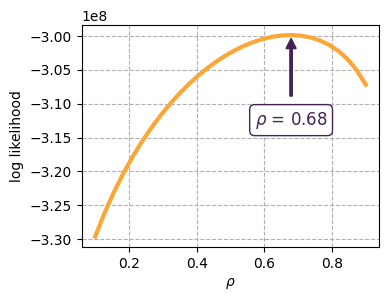

In [27]:
scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
plt.plot(1-np.array(results_all_x), results_all_y, label='all citations', color=plt.cm.plasma(0.8), linewidth=3)
plt.xlabel('$\\rho$')
plt.ylabel('log likelihood')
plt.grid(linestyle='--')
arrow_x = 1-np.array(results_all_x)[np.argmax(results_all_y)]
arrow_y = max(results_all_y)
plt.arrow(arrow_x, arrow_y - 0.09 * 1e8, 0, 0.07 * 1e8, width = 0.007, head_width=0.03, head_length=0.015 * 1e8, fc='#442254', ec='#442254', antialiased = True, capstyle = 'round', zorder=2)
plt.text(arrow_x, arrow_y - 0.11 * 1e8, '$\\rho$ = 0.68', fontsize=12, zorder=3, horizontalalignment='center', verticalalignment='top', bbox=dict(boxstyle='round', fc="w", ec="#442254"), color='#442254')
plt.savefig('figures/combined-a.pdf', bbox_inches='tight')

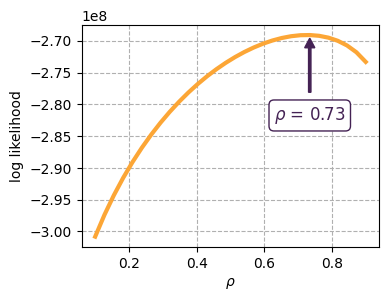

In [28]:
scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
plt.plot(1-np.array(results_external_x), results_external_y, label='all citations', color=plt.cm.plasma(0.8), linewidth=3)
plt.xlabel('$\\rho$')
plt.ylabel('log likelihood')
plt.grid(linestyle='--')
arrow_x = 1-np.array(results_external_x)[np.argmax(results_external_y)]
arrow_y = max(results_external_y)
plt.arrow(arrow_x, arrow_y - 0.09 * 1e8, 0, 0.07 * 1e8, width = 0.007, head_width=0.03, head_length=0.015 * 1e8, fc='#442254', ec='#442254', antialiased = True, capstyle = 'round', zorder=2)
plt.text(arrow_x, arrow_y - 0.11 * 1e8, '$\\rho$ = 0.73', fontsize=12, zorder=3, horizontalalignment='center', verticalalignment='top', bbox=dict(boxstyle='round', fc="w", ec="#442254"), color='#442254')  
plt.savefig('figures/combined-b.pdf', bbox_inches='tight')

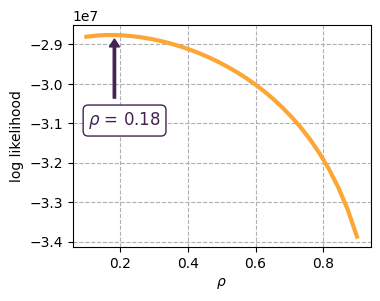

In [29]:
scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
plt.plot(1-np.array(results_self_x), results_self_y, label='all citations', color=plt.cm.plasma(0.8), linewidth=3)
plt.xlabel('$\\rho$')
plt.ylabel('log likelihood')
plt.grid(linestyle='--')
arrow_x = 1-np.array(results_self_x)[np.argmax(results_self_y)]
arrow_y = max(results_self_y)
plt.arrow(arrow_x, arrow_y - 0.16 * 1e7, 0, 0.13 * 1e7, width = 0.007, head_width=0.03, head_length=0.02 * 1e7, fc='#442254', ec='#442254', antialiased = True, capstyle = 'round', zorder=2)
plt.text(arrow_x + 0.03, arrow_y - 0.19 * 1e7, '$\\rho$ = 0.18', fontsize=12, zorder=3, horizontalalignment='center', verticalalignment='top', bbox=dict(boxstyle='round', fc="w", ec="#442254"), color='#442254')
plt.savefig('figures/combined-c.pdf', bbox_inches='tight')

In [30]:
results_individual = pd.read_csv('results/model_random_par_citations_separate.csv')
results_individual

,id,articles,citations,external_citations,self_citations,alpha_all,alpha_external,alpha_self,3dsi
0,2128134587,33,52,41,11,0.873439,0.799356,0.989994,0.000001
1,2101782692,14,17,6,11,0.989994,0.967572,0.989994,0.000001
2,2114054191,10,8,6,2,0.989994,0.989994,0.989994,0.000001
3,1989208940,17,34,26,8,0.452879,0.296007,0.975724,0.389700
4,2022192081,37,112,105,7,0.427310,0.393475,0.771238,0.395927
...,...,...,...,...,...,...,...,...,...
200203,2250541491,10,28,24,4,0.989994,0.989994,0.989994,0.000001
200204,2921017214,11,17,13,4,0.651135,0.583113,0.875353,0.000001
200205,157725681,13,412,383,29,0.331805,0.304377,0.747586,0.365538
200206,2219632820,11,24,21,3,0.759216,0.717667,0.989994,0.020952


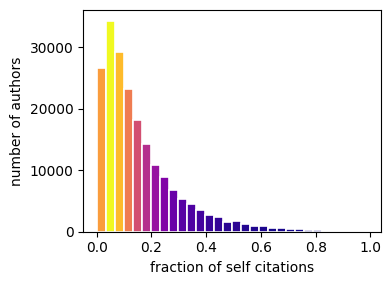

In [31]:
results_filtered = results_individual.loc[results_individual['citations'] > 0]

scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))

N, bins, patches = plt.hist(results_filtered.self_citations / results_filtered.citations, bins=30, color='#442254', edgecolor='white', linewidth=1.2)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel('fraction of self citations')
plt.ylabel('number of authors')
plt.savefig('figures/fself.pdf', bbox_inches='tight')

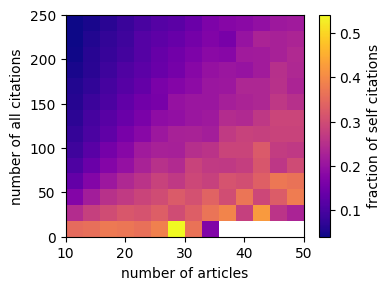

In [32]:
scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))

results_filtered = results_individual.loc[results_individual['citations'] > 0]

cmap = 'plasma'

x = results_filtered['articles']
y = results_filtered['citations']
z = results_filtered['self_citations'] / results_filtered['citations']

ax = plt.subplot(111)

xbins = np.linspace(10, 50, 15)
ybins = np.linspace(0, 250, 15)

statistic, x_edge, y_edge, _ = binned_statistic_2d(x, y, z, statistic = 'mean', bins = (xbins, ybins))
#statistic[statistic == 0] = 1
hb = ax.pcolormesh(x_edge, y_edge, statistic.T, cmap = cmap, linewidth=0, rasterized=True)
hb.set_edgecolor('face')
plt.colorbar(hb, ax = ax, label = 'fraction of self citations')
ax.set_xlabel('number of articles')
ax.set_ylabel('number of all citations')

plt.savefig('figures/fselfheatmap.pdf', bbox_inches='tight')

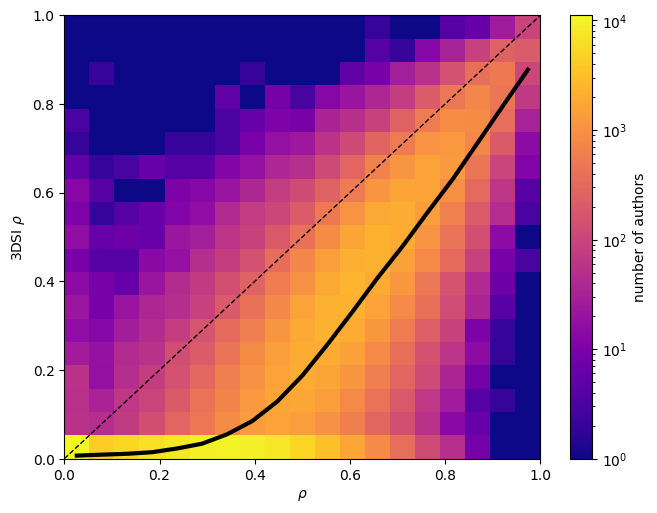

In [33]:
scale_factor = 1.2
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))

results_filtered = results_individual.loc[results_individual['citations'] > 0]

cmap = 'plasma'

x = 1 - results_filtered['alpha_all']
y = results_filtered['3dsi']

ax = plt.subplot(111)

xbins = np.linspace(0, 1, 20)
ybins = np.linspace(0, 1, 20)

bin_means, bin_edges, _ = binned_statistic(x, y, statistic = 'mean', bins = xbins)
bin_centres = bin_edges[:-1] + 0.5 * (bin_edges[1:] - bin_edges[:-1])
indices = ~np.isnan(bin_means)
bin_means = bin_means[indices]
bin_centres = bin_centres[indices]

statistic, x_edge, y_edge, _ = binned_statistic_2d(x, y, None, statistic = 'count', bins = (xbins, ybins))
statistic[statistic == 0] = 1
hb = ax.pcolormesh(x_edge, y_edge, statistic.T, cmap = cmap, norm=colors.LogNorm(vmin=1, vmax=statistic.max()), linewidth=0, rasterized=True)
hb.set_edgecolor('face')
plt.colorbar(hb, ax = ax, label = 'number of authors')
ax.plot(bin_centres, bin_means, color = 'black', linewidth = 3)
ax.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), 'black', linestyle='--', linewidth = 1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('3DSI $\\rho$')
plt.savefig('figures/3dsi.pdf', bbox_inches='tight')

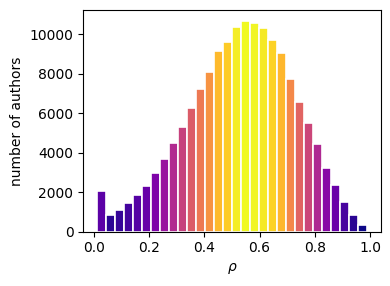

In [34]:
results_filtered = results_individual.loc[results_individual['citations'] > 50]

scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
N, bins, patches = plt.hist(1-results_filtered['alpha_all'], bins=30, color='#442254', edgecolor='white', linewidth=1.2)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel('$\\rho$')
plt.ylabel('number of authors')
plt.savefig('figures/individual-a.pdf', bbox_inches='tight')

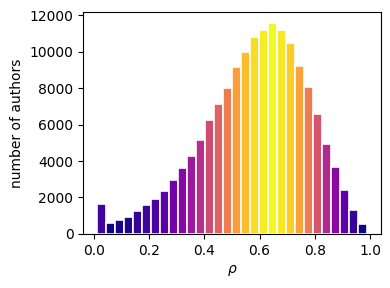

In [35]:
results_filtered = results_individual.loc[results_individual['citations'] > 50]

scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
N, bins, patches = plt.hist(1-results_filtered['alpha_external'], bins=30, color='#442254', edgecolor='white', linewidth=1.2)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel('$\\rho$')
plt.ylabel('number of authors')
plt.savefig('figures/individual-b.pdf', bbox_inches='tight')

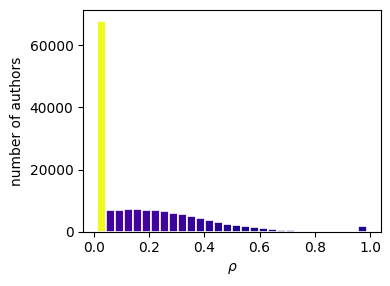

In [36]:
results_filtered = results_individual.loc[results_individual['citations'] > 50]

scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))
N, bins, patches = plt.hist(1-results_filtered['alpha_self'], bins=30, color='#442254', edgecolor='white', linewidth=1.2)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.plasma(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel('$\\rho$')
plt.ylabel('number of authors')
plt.savefig('figures/individual-c.pdf', bbox_inches='tight')

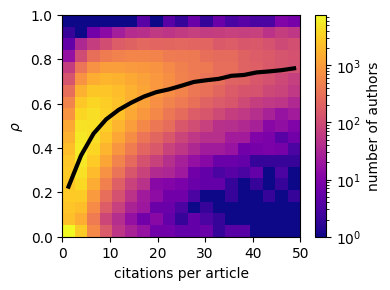

In [37]:
results_filtered = results_individual.loc[results_individual['citations'] > 0]

scale_factor = 0.6
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))

cmap = 'plasma'

x = results_filtered['citations'] / results_filtered['articles']
y = 1-results_individual['alpha_all']

ax = plt.subplot(111)

xbins = np.linspace(0, 50, 20)
ybins = np.linspace(0, 1, 20)

bin_means, bin_edges, _ = binned_statistic(x, y, statistic = 'mean', bins = xbins)
bin_centres = bin_edges[:-1] + 0.5 * (bin_edges[1:] - bin_edges[:-1])
indices = ~np.isnan(bin_means)
bin_means = bin_means[indices]
bin_centres = bin_centres[indices]

statistic, x_edge, y_edge, _ = binned_statistic_2d(x, y, None, statistic = 'count', bins = (xbins, ybins))
statistic[statistic == 0] = 1
hb = ax.pcolormesh(x_edge, y_edge, statistic.T, cmap = cmap, norm=colors.LogNorm(vmin=1, vmax=statistic.max()), linewidth=0, rasterized=True)
hb.set_edgecolor('face')
plt.colorbar(hb, ax = ax, label = 'number of authors')
ax.plot(bin_centres, bin_means, color = 'black', linewidth = 3)
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)
ax.set_xlabel('citations per article')
ax.set_ylabel('$\\rho$')
plt.savefig('figures/individual-d.pdf', bbox_inches='tight')

In [38]:
scopus_simulations = pd.read_csv('data/scopus/scopus-simulations.csv')

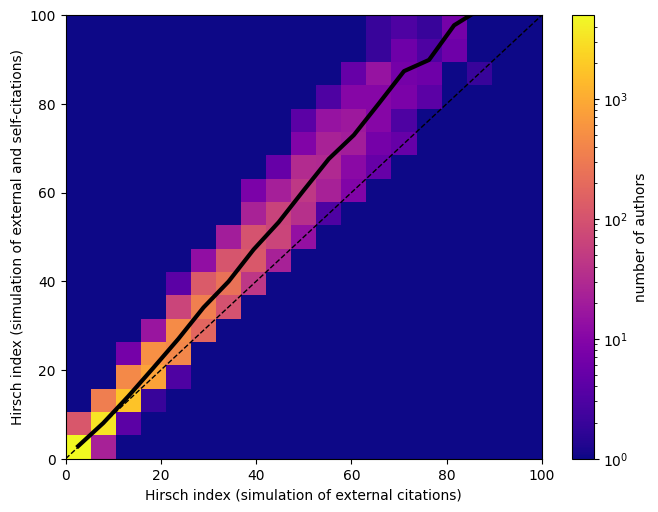

In [39]:
scale_factor = 1.2
plt.figure(figsize=(6.4 * scale_factor, 4.8 * scale_factor))

cmap = 'plasma'

x = scopus_simulations['hindex_external']
y = scopus_simulations['hindex_both']

ax = plt.subplot(111)

hmax = 100

xbins = np.linspace(0, hmax, 20)
ybins = np.linspace(0, hmax, 20)

bin_means, bin_edges, _ = binned_statistic(x, y, statistic = 'mean', bins = xbins)
bin_centres = bin_edges[:-1] + 0.5 * (bin_edges[1:] - bin_edges[:-1])
indices = ~np.isnan(bin_means)
bin_means = bin_means[indices]
bin_centres = bin_centres[indices]

statistic, x_edge, y_edge, _ = binned_statistic_2d(x, y, None, statistic = 'count', bins = (xbins, ybins))
statistic[statistic == 0] = 1
hb = ax.pcolormesh(x_edge, y_edge, statistic.T, cmap = cmap, norm=colors.LogNorm(vmin=1, vmax=statistic.max()), linewidth=0, rasterized=True)
hb.set_edgecolor('face')
plt.colorbar(hb, ax = ax, label = 'number of authors')
ax.plot(bin_centres, bin_means, color = 'black', linewidth = 3)
ax.plot(np.linspace(0, hmax, 10), np.linspace(0, hmax, 10), 'black', linestyle='--', linewidth = 1)
ax.set_xlim(0, hmax)
ax.set_ylim(0, hmax)
ax.set_xlabel('Hirsch index (simulation of external citations)')
ax.set_ylabel('Hirsch index (simulation of external and self-citations)')
plt.savefig('figures/sim-comp.pdf', bbox_inches='tight')